In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# loading the data
df = pd.read_csv('CombinedData/PlayerInfo/Tight_End.csv')

print(df.shape)
df.head()

(694, 15)


,Date,Away Team,Home Team,Player,Player Team,Passing Yards,Passing TD,Passing INT,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost,Pos
0,2024-09-05,Baltimore Ravens,Kansas City Chiefs,isaiah likely,Baltimore Ravens,0,0,0,9,111,1,0,0,0,TE
1,2024-09-05,Baltimore Ravens,Kansas City Chiefs,mark andrews,Baltimore Ravens,0,0,0,2,14,0,0,0,0,TE
2,2024-09-05,Baltimore Ravens,Kansas City Chiefs,noah gray,Kansas City Chiefs,0,0,0,3,37,0,0,0,0,TE
3,2024-09-05,Baltimore Ravens,Kansas City Chiefs,travis kelce,Kansas City Chiefs,0,0,0,3,34,0,0,0,0,TE
4,2024-09-06,Green Bay Packers,Philadelphia Eagles,tucker kraft,Green Bay Packers,0,0,0,2,37,0,0,0,0,TE


In [3]:
# adding fantasy points for each player
points_per_rushing_yard = 0.1
points_per_rushing_td = 6
points_per_reception = 1
points_per_receiving_yard = 0.1
points_per_receiving_td = 6
points_per_fumble = -2

def get_player_points(row):
    points = 0
    points += row['Rushing Yards'] * points_per_rushing_yard
    points += row['Rushing TD'] * points_per_rushing_td
    points += row['Receptions'] * points_per_reception
    points += row['Receiving Yards'] * points_per_receiving_yard
    points += row['Receiving TD'] * points_per_receiving_td
    points += row['Fumbles Lost'] * points_per_fumble

    return points

df['Fantasy Points'] = df.apply(get_player_points, axis=1)

df.head()

,Date,Away Team,Home Team,Player,Player Team,Passing Yards,Passing TD,Passing INT,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost,Pos,Fantasy Points
0,2024-09-05,Baltimore Ravens,Kansas City Chiefs,isaiah likely,Baltimore Ravens,0,0,0,9,111,1,0,0,0,TE,26.1
1,2024-09-05,Baltimore Ravens,Kansas City Chiefs,mark andrews,Baltimore Ravens,0,0,0,2,14,0,0,0,0,TE,3.4
2,2024-09-05,Baltimore Ravens,Kansas City Chiefs,noah gray,Kansas City Chiefs,0,0,0,3,37,0,0,0,0,TE,6.7
3,2024-09-05,Baltimore Ravens,Kansas City Chiefs,travis kelce,Kansas City Chiefs,0,0,0,3,34,0,0,0,0,TE,6.4
4,2024-09-06,Green Bay Packers,Philadelphia Eagles,tucker kraft,Green Bay Packers,0,0,0,2,37,0,0,0,0,TE,5.7


In [4]:
# adding the next week fantasy points (and log transformed fantasy points)
df['Next Week Fantasy Points'] = df.groupby('Player')['Fantasy Points'].shift(-1)
df['Next Week Fantasy Points Log'] = np.log1p(df['Next Week Fantasy Points'])

print(df.shape)
df = df.dropna(subset=['Next Week Fantasy Points'])
df = df.dropna(subset=['Next Week Fantasy Points Log'])
print(df.shape)

df[df['Player'] == 'isaiah likely']

(694, 18)
(586, 18)


,Date,Away Team,Home Team,Player,Player Team,Passing Yards,Passing TD,Passing INT,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost,Pos,Fantasy Points,Next Week Fantasy Points,Next Week Fantasy Points Log
0,2024-09-05,Baltimore Ravens,Kansas City Chiefs,isaiah likely,Baltimore Ravens,0,0,0,9,111,1,0,0,0,TE,26.1,4.6,1.722767
87,2024-09-15,Las Vegas Raiders,Baltimore Ravens,isaiah likely,Baltimore Ravens,0,0,0,2,26,0,0,0,0,TE,4.6,1.4,0.875469
125,2024-09-22,Baltimore Ravens,Dallas Cowboys,isaiah likely,Baltimore Ravens,0,0,0,1,4,0,0,0,0,TE,1.4,3.6,1.526056
185,2024-09-29,Buffalo Bills,Baltimore Ravens,isaiah likely,Baltimore Ravens,0,0,0,1,26,0,0,0,0,TE,3.6,16.3,2.850707
246,2024-10-06,Baltimore Ravens,Cincinnati Bengals,isaiah likely,Baltimore Ravens,0,0,0,3,13,2,0,0,0,TE,16.3,4.7,1.740466
338,2024-10-13,Washington Commanders,Baltimore Ravens,isaiah likely,Baltimore Ravens,0,0,0,2,27,0,0,0,0,TE,4.7,3.7,1.547563
393,2024-10-21,Baltimore Ravens,Tampa Bay Buccaneers,isaiah likely,Baltimore Ravens,0,0,0,2,17,0,0,0,0,TE,3.7,8.7,2.272126
412,2024-10-27,Baltimore Ravens,Cleveland Browns,isaiah likely,Baltimore Ravens,0,0,0,4,47,0,0,0,0,TE,8.7,0.0,0.000000
483,2024-11-03,Denver Broncos,Baltimore Ravens,isaiah likely,Baltimore Ravens,0,0,0,0,0,0,0,0,0,TE,0.0,9.5,2.351375


In [ ]:
# save data to csv
df.to_csv('tightends.csv', index=False)

### EDA

<Axes: >

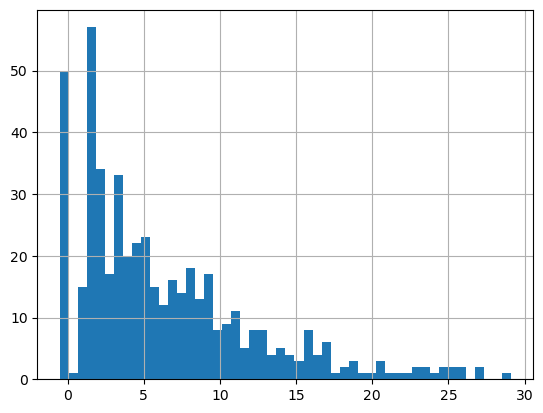

In [6]:
df['Fantasy Points'].hist(bins=50)

In [7]:
# applying a log transformation to Fantasy Points
df['Fantasy Points Log'] = np.log1p(df['Fantasy Points'])

df = df.drop(df[df['Fantasy Points'] == -1].index)

df.head()

,Date,Away Team,Home Team,Player,Player Team,Passing Yards,Passing TD,Passing INT,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost,Pos,Fantasy Points,Next Week Fantasy Points,Next Week Fantasy Points Log,Fantasy Points Log
0,2024-09-05,Baltimore Ravens,Kansas City Chiefs,isaiah likely,Baltimore Ravens,0,0,0,9,111,1,0,0,0,TE,26.1,4.6,1.722767,3.299534
1,2024-09-05,Baltimore Ravens,Kansas City Chiefs,mark andrews,Baltimore Ravens,0,0,0,2,14,0,0,0,0,TE,3.4,9.1,2.312535,1.481605
2,2024-09-05,Baltimore Ravens,Kansas City Chiefs,noah gray,Kansas City Chiefs,0,0,0,3,37,0,0,0,0,TE,6.7,2.3,1.193922,2.041220
3,2024-09-05,Baltimore Ravens,Kansas City Chiefs,travis kelce,Kansas City Chiefs,0,0,0,3,34,0,0,0,0,TE,6.4,1.6,0.955511,2.001480
4,2024-09-06,Green Bay Packers,Philadelphia Eagles,tucker kraft,Green Bay Packers,0,0,0,2,37,0,0,0,0,TE,5.7,3.6,1.526056,1.902108


<Axes: >

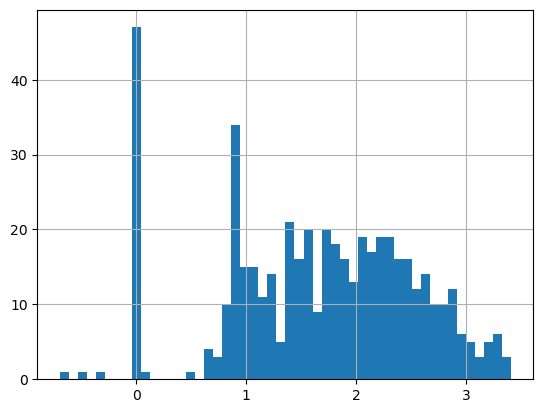

In [8]:
df['Fantasy Points Log'].hist(bins=50)

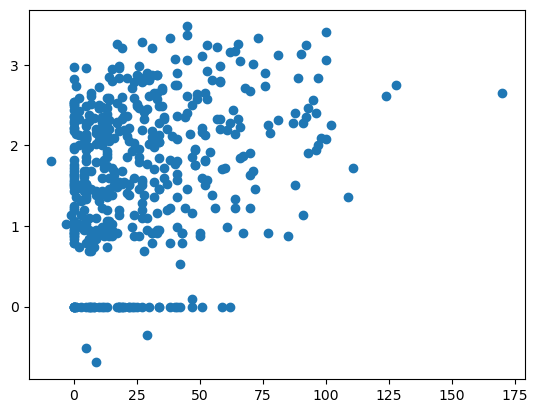

In [9]:
plt.scatter(df['Receiving Yards'], df['Next Week Fantasy Points Log'])

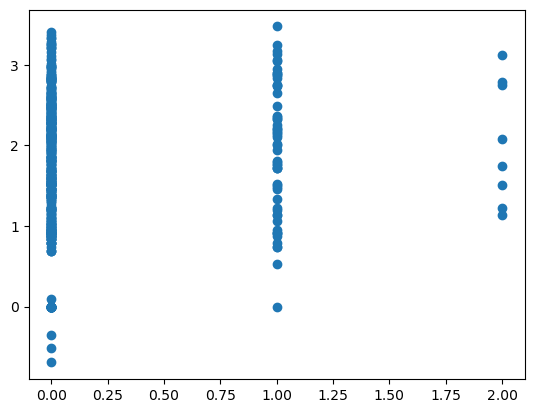

In [10]:
plt.scatter(df['Receiving TD'], df['Next Week Fantasy Points Log'])

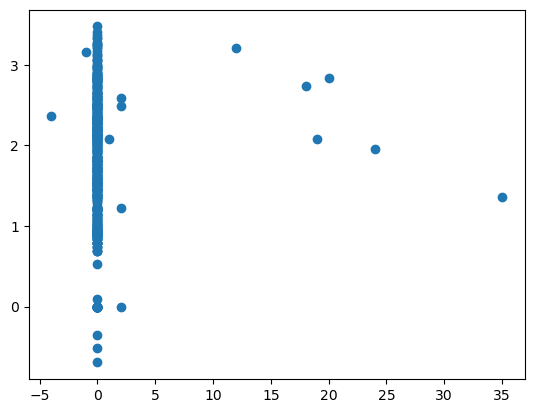

In [11]:
plt.scatter(df['Rushing Yards'], df['Next Week Fantasy Points Log'])

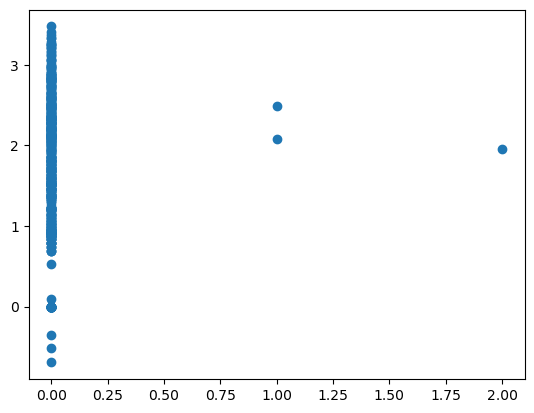

In [12]:
plt.scatter(df['Rushing TD'], df['Next Week Fantasy Points Log'])

### Creating XGB Model

In [13]:
df.head()

,Date,Away Team,Home Team,Player,Player Team,Passing Yards,Passing TD,Passing INT,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost,Pos,Fantasy Points,Next Week Fantasy Points,Next Week Fantasy Points Log,Fantasy Points Log
0,2024-09-05,Baltimore Ravens,Kansas City Chiefs,isaiah likely,Baltimore Ravens,0,0,0,9,111,1,0,0,0,TE,26.1,4.6,1.722767,3.299534
1,2024-09-05,Baltimore Ravens,Kansas City Chiefs,mark andrews,Baltimore Ravens,0,0,0,2,14,0,0,0,0,TE,3.4,9.1,2.312535,1.481605
2,2024-09-05,Baltimore Ravens,Kansas City Chiefs,noah gray,Kansas City Chiefs,0,0,0,3,37,0,0,0,0,TE,6.7,2.3,1.193922,2.041220
3,2024-09-05,Baltimore Ravens,Kansas City Chiefs,travis kelce,Kansas City Chiefs,0,0,0,3,34,0,0,0,0,TE,6.4,1.6,0.955511,2.001480
4,2024-09-06,Green Bay Packers,Philadelphia Eagles,tucker kraft,Green Bay Packers,0,0,0,2,37,0,0,0,0,TE,5.7,3.6,1.526056,1.902108


In [25]:
# only selecting the relevant features
tes = df[['Receptions', 'Receiving Yards', 'Receiving TD', 'Rushing Yards', 'Rushing TD', 'Fumbles Lost', 'Next Week Fantasy Points Log']]

tes.head()

,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost,Next Week Fantasy Points Log
0,9,111,1,0,0,0,1.722767
1,2,14,0,0,0,0,2.312535
2,3,37,0,0,0,0,1.193922
3,3,34,0,0,0,0,0.955511
4,2,37,0,0,0,0,1.526056


In [26]:
# handling infinite values
tes = tes.replace([np.inf, -np.inf], np.nan)

tes = tes.dropna()

In [27]:
X = tes.drop('Next Week Fantasy Points Log', axis=1)
y = tes[['Next Week Fantasy Points Log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [28]:
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()


In [18]:
model = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print('MSE: %.2f' % mse)

MSE: 41.52


## Bayesion Optimization

In [20]:
from bayes_opt import BayesianOptimization

class BayesianXGBOptimizer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
        # Define hyperparameter bounds
        self.pbounds = {
            'max_depth': (3, 12),            # Tree depth
            'learning_rate': (0.01, 0.3),    # Learning rate
            'n_estimators': (100, 1000),     # Number of trees
            'min_child_weight': (1, 7),      # Minimum sum of instance weight in a child
            'gamma': (0, 0.5),               # Minimum loss reduction for partition
            'subsample': (0.6, 1.0),         # Subsample ratio of training instances
            'colsample_bytree': (0.6, 1.0),  # Subsample ratio of columns for each tree
        }
        
    def xgb_evaluate(self, max_depth, learning_rate, n_estimators, 
                    min_child_weight, gamma, subsample, colsample_bytree):
        """Evaluation function for Bayesian optimization"""
        params = {
            'max_depth': int(max_depth),
            'learning_rate': learning_rate,
            'n_estimators': int(n_estimators),
            'min_child_weight': min_child_weight,
            'gamma': gamma,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'objective': 'reg:squarederror',
            'random_state': 42
        }
        
        model = model = xgb.XGBRegressor(**params)
        model.fit(self.X_train, self.y_train)
        predictions = model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, predictions)
        
        # Return negative MSE because Bayesian optimization maximizes
        return -mse
    
    def optimize(self, n_iter=50, init_points=5):
        """Run Bayesian optimization"""
        optimizer = BayesianOptimization(
            f=self.xgb_evaluate,
            pbounds=self.pbounds,
            random_state=42
        )
        
        optimizer.maximize(
            init_points=init_points,  # Number of initial random evaluations
            n_iter=n_iter             # Number of optimization iterations
        )
        
        # Get best parameters
        params = optimizer.max['params']
        params['max_depth'] = int(params['max_depth'])
        params['n_estimators'] = int(params['n_estimators'])
        
        # Train final model with best parameters
        final_model = xgb.XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            **params
        )
        final_model.fit(self.X_train, self.y_train)
        
        return {
            'best_params': params,
            'best_score': -optimizer.max['target'],  # Convert back to MSE
            'model': final_model,
            'optimization_history': optimizer.space.target
        }
    

optimizer = BayesianXGBOptimizer(X_train, X_test, y_train, y_test)
results = optimizer.optimize(n_iter=50, init_points=5)

print('Best score: %.2f' % results['best_score'])
print('Best parameters:', results['best_params'])

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.6837   | 0.7498    | 0.4754    | 0.2223    | 8.388     | 1.936     | 240.4     | 0.6232    |
| 2         | -0.7215   | 0.9465    | 0.3006    | 0.2153    | 3.185     | 6.819     | 849.2     | 0.6849    |
| 3         | -0.6761   | 0.6727    | 0.0917    | 0.09823   | 7.723     | 3.592     | 362.1     | 0.8447    |
| 4         | -0.6501   | 0.6558    | 0.1461    | 0.1162    | 7.105     | 5.711     | 279.7     | 0.8057    |
| 5         | -0.7912   | 0.837     | 0.02323   | 0.1862    | 4.535     | 1.39      | 954.0     | 0.9863    |
| 6         | -0.64     | 0.752     | 0.1754    | 0.1722    | 4.025     | 6.601     | 593.7     | 0.9695    |
| 7         | -0.6282   | 1.0       | 0.4285    | 0.01725   | 8.757     | 4.856     | 595.5     | 0.6085    |
| 8       

In [21]:
model = results['model']

y_pred = model.predict(X_test)

mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print('MSE: %.2f' % mse)

MSE: 30.71


### Comparing predictions and actual values

In [22]:
X_test.head()

,Receptions,Receiving Yards,Receiving TD,Rushing Yards,Rushing TD,Fumbles Lost
76,3,65,0,0,0,0
495,5,100,2,0,0,0
5,0,0,0,0,0,0
478,7,71,0,0,0,0
490,5,45,0,0,0,0


In [23]:
predictions = model.predict(X_test.head())

In [24]:
temp_df = y_test.head()
temp_df['Next Week Fantasy Points'] = np.expm1(temp_df['Next Week Fantasy Points Log'])
temp_df['predictions'] = np.expm1(predictions)
temp_df['percent_difference'] = (temp_df['Next Week Fantasy Points'] - temp_df['predictions']) / temp_df['Next Week Fantasy Points']
temp_df

C:\Users\wolfgramml\AppData\Local\Temp\ipykernel_23244\1188303242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Next Week Fantasy Points'] = np.expm1(temp_df['Next Week Fantasy Points Log'])
C:\Users\wolfgramml\AppData\Local\Temp\ipykernel_23244\1188303242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['predictions'] = np.expm1(predictions)
C:\Users\wolfgramml\AppData\Local\Temp\ipykernel_23244\1188303242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Next Week Fantasy Points Log,Next Week Fantasy Points,predictions,percent_difference
76,2.322388,9.2,5.462121,0.406291
495,2.079442,7.0,7.200123,-0.028589
5,0.955511,1.6,3.654359,-1.283974
478,1.686399,4.4,6.157088,-0.399338
490,2.397895,10.0,5.460696,0.453930
